In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from nltk import sent_tokenize, word_tokenize

In [17]:
from pytorch_transformers import XLNetModel, XLNetTokenizer

In [2]:
NUM_WINES = 20
data = pd.read_csv(r"D:\Data\wine-reviews\winemag-data-130k-v2.tsv")
data.head()
data.columns
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'country', 'designation',
       'points', 'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'winery'], axis=1)
data = data[pd.notnull(data['variety'])]
data = data[pd.notnull(data['description'])]

In [3]:
description_list = data["description"].values

In [4]:
seq_lengths = [len(x) for x in description_list]

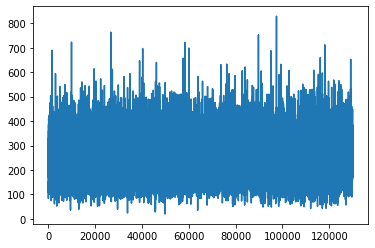

In [5]:
plt.plot(seq_lengths)

In [ ]:
data["seq_lengths"] = data["description"].apply(lambda x: len(word_tokenize(x)))

In [19]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)
data["seq_lengths_XLNet"] = data["description"].apply(lambda x: len(tokenizer.tokenize(x)))

In [20]:
data["seq_lengths"].describe()

count    129970.000000
mean         47.208279
std          12.943369
min           4.000000
25%          38.000000
50%          46.000000
75%          55.000000
max         156.000000
Name: seq_lengths, dtype: float64

In [22]:
data["seq_lengths_XLNet"].describe()

count    129970.000000
mean         59.414526
std          17.204376
min           6.000000
25%          47.000000
50%          58.000000
75%          70.000000
max         216.000000
Name: seq_lengths_XLNet, dtype: float64

In [14]:
data.head()

,description,variety,seq_lengths
0,"Aromas include tropical fruit, broom, brimston...",White Blend,31
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,44
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,33
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,38
4,"Much like the regular bottling from 2012, this...",Pinot Noir,50


In [15]:
small_data = data[:30]

In [23]:
small_data.head()

,description,variety,seq_lengths
0,"Aromas include tropical fruit, broom, brimston...",White Blend,31
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,44
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,33
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,38
4,"Much like the regular bottling from 2012, this...",Pinot Noir,50


In [24]:
x = [1,2,3]

In [27]:
d = description_list[0]

In [44]:
z = np.zeros(128)

In [45]:
position = 0

In [54]:
def mask_maker(description):
    z = np.zeros(128)
    position = 0
    count = 1
    for sent in sent_tokenize(description):
        sent_len = len(tokenizer.tokenize(sent))
        z[position:sent_len+1] = count
        position+=sent_len
        count+=1
    
    return z

In [43]:
for sent in sent_tokenize(d):
    print(sent, len(tokenizer.tokenize(sent)))

Aromas include tropical fruit, broom, brimstone and dried herb. 12
The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity. 19


In [55]:
mask_maker(d)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])